In [119]:
import os
import matplotlib.pyplot as plt

import tensorflow as tf

tf.enable_eager_execution()

print('Tensorflow version: {}'.format(tf.__version__))
print('Eager execution: {}'.format(tf.executing_eagerly()))

Tensorflow version: 1.13.1
Eager execution: True


In [120]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

Local copy of the dataset file: C:\Users\works\.keras\datasets\iris_training.csv


In [121]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
feature_names = column_names[:-1]
label_name = column_names[-1]
print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [122]:
batch_size = 32

train_dataset = tf.contrib.data.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

In [123]:
features, labels = next(iter(train_dataset))
print(features)
print(labels)

OrderedDict([('sepal_length', <tf.Tensor: id=216053, shape=(32,), dtype=float32, numpy=
array([5.7, 6. , 6.1, 5. , 6.7, 6.3, 6.7, 5. , 4.7, 6.5, 5.5, 5.5, 5.9,
       6.8, 5.7, 5.5, 7.7, 5.1, 4.6, 6.3, 5.4, 7.7, 5. , 6.1, 5.4, 4.4,
       6. , 5.8, 5.1, 5.6, 5. , 5.2], dtype=float32)>), ('sepal_width', <tf.Tensor: id=216054, shape=(32,), dtype=float32, numpy=
array([3.8, 3. , 2.6, 2. , 3.1, 2.5, 3.1, 3.5, 3.2, 3. , 2.4, 2.4, 3. ,
       2.8, 3. , 2.6, 3. , 3.8, 3.1, 3.4, 3. , 2.8, 3.3, 3. , 3.9, 3. ,
       2.7, 4. , 3.8, 2.7, 3.6, 2.7], dtype=float32)>), ('petal_length', <tf.Tensor: id=216051, shape=(32,), dtype=float32, numpy=
array([1.7, 4.8, 5.6, 3.5, 5.6, 5. , 4.4, 1.3, 1.6, 5.8, 3.8, 3.7, 5.1,
       4.8, 4.2, 4.4, 6.1, 1.6, 1.5, 5.6, 4.5, 6.7, 1.4, 4.9, 1.3, 1.3,
       5.1, 1.2, 1.5, 4.2, 1.4, 3.9], dtype=float32)>), ('petal_width', <tf.Tensor: id=216052, shape=(32,), dtype=float32, numpy=
array([0.3, 1.8, 1.4, 1. , 2.4, 1.9, 1.4, 0.3, 0.2, 2.2, 1.1, 1. , 1.8,
       1.4, 1.2, 

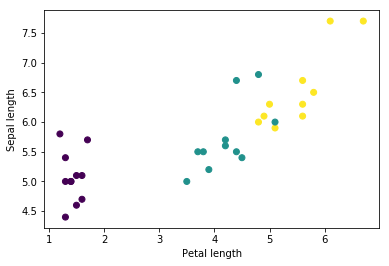

In [124]:
plt.scatter(features['petal_length'].numpy(),
            features['sepal_length'].numpy(),
            c=labels.numpy(),
            cmap='viridis')
plt.xlabel('Petal length')
plt.ylabel('Sepal length')
plt.show()

In [125]:
def pack_features_vector(features, labels):
    features = tf.stack(list(features.values()), axis=1)
    return features, labels

In [126]:
train_dataset = train_dataset.map(pack_features_vector)

In [127]:
features, labels = next(iter(train_dataset))
print(features[:5])

tf.Tensor(
[[4.9 2.4 3.3 1. ]
 [6.7 3.  5.  1.7]
 [4.8 3.4 1.6 0.2]
 [5.7 2.8 4.5 1.3]
 [5.  3.5 1.3 0.3]], shape=(5, 4), dtype=float32)


In [128]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(3)
])

In [129]:
predictions = model(features)
predictions[:5]

<tf.Tensor: id=216195, shape=(5, 3), dtype=float32, numpy=
array([[-1.059525  , -0.3032974 , -0.13337773],
       [-1.3609793 , -0.32426876, -0.31489623],
       [-0.90999097, -0.2603187 , -0.13447452],
       [-0.9988035 , -0.17311609, -0.38540107],
       [-0.9865761 , -0.28979063, -0.12428594]], dtype=float32)>

In [130]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: id=216201, shape=(5, 3), dtype=float32, numpy=
array([[0.17683503, 0.3766984 , 0.4464666 ],
       [0.15000588, 0.42300543, 0.4269887 ],
       [0.19659394, 0.37646034, 0.42694572],
       [0.19492593, 0.4451036 , 0.35997048],
       [0.18601644, 0.3733889 , 0.4405946 ]], dtype=float32)>

In [131]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Prediction: [2 2 2 1 2 2 2 1 2 1 2 2 1 2 2 1 1 2 2 1 2 1 2 2 2 1 2 1 1 1 1 2]
    Labels: [1 1 0 1 0 1 0 2 1 2 1 0 2 1 1 2 2 0 1 2 0 0 1 0 0 2 1 2 2 2 2 0]


In [132]:
def loss(model, x, y):
    y_ = model(x)
    return tf.losses.sparse_softmax_cross_entropy(labels=y, logits=y_)

l = loss(model, features, labels)
print("Loss test: {}".format(l))

Loss test: 1.2918012142181396


In [133]:
def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [134]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
global_step = tf.Variable(0)

In [135]:
loss_value, grads = grad(model, features, labels)
print("Step: {}, Initial Loss: {}".format(global_step.numpy(), loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables), global_step)
print("Step: {},         Loss: {}".format(global_step.numpy(), loss(model, features, labels).numpy()))

Step: 0, Initial Loss: 1.2918012142181396
Step: 1,         Loss: 1.2438300848007202


In [136]:
tfe = tf.contrib.eager

train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
    epoch_loss_avg = tfe.metrics.Mean()
    epoch_accuracy = tfe.metrics.Accuracy()
    
    for x, y in train_dataset:
        loss_value, grads = grad(model, x, y)
        optimizer.apply_gradients(zip(grads, model.trainable_variables), global_step)
        
        epoch_loss_avg(loss_value)
        epoch_accuracy(tf.argmax(model(x), axis=1, output_type=tf.int32), y)
        
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())
    
    if epoch % 50 == 0:
        print('Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}'.format(epoch, epoch_loss_avg.result(), epoch_accuracy.result()))

Epoch 000: Loss: 1.192, Accuracy: 20.000%
Epoch 050: Loss: 0.448, Accuracy: 86.667%
Epoch 100: Loss: 0.271, Accuracy: 95.833%
Epoch 150: Loss: 0.174, Accuracy: 96.667%
Epoch 200: Loss: 0.132, Accuracy: 98.333%


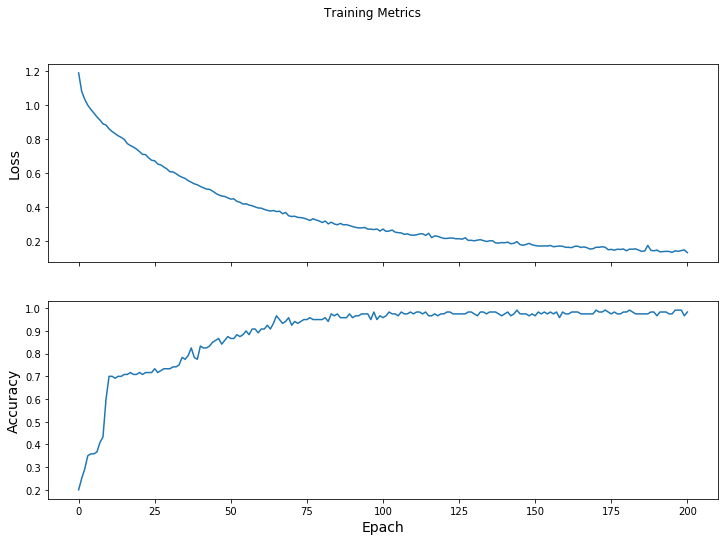

In [137]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel('Loss', fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel('Accuracy', fontsize=14)
axes[1].set_xlabel('Epach', fontsize=14)
axes[1].plot(train_accuracy_results)

In [140]:
test_url = 'https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv'
test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url), origin=test_url)

In [142]:
test_dataset = tf.contrib.data.make_csv_dataset(
    test_fp,
    batch_size,
    column_names=column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False)
test_dataset = test_dataset.map(pack_features_vector)

In [146]:
test_accuracy = tfe.metrics.Accuracy()

for x, y in test_dataset:
    prediction = tf.argmax(model(x), axis=1, output_type=tf.int32)
    test_accuracy(prediction, y)
    
print('Test set accuracy: {:.3%}'.format(test_accuracy.result()))

Test set accuracy: 93.333%


In [147]:
tf.stack([y,prediction],axis=1)

<tf.Tensor: id=324001, shape=(30, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 1],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1]])>

In [148]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

predictions = model(predict_dataset)

for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: Iris setosa (97.7%)
Example 1 prediction: Iris versicolor (92.9%)
Example 2 prediction: Iris virginica (65.3%)
